# 1. Data Cleaning
Preprocess the global energy datasets to handle missing values, outliers, and inconsistencies in energy intensity, renewable energy share, GDP, and income inequality fields.


In [8]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [9]:
#import the file from github
github_csv_url = 'https://raw.githubusercontent.com/mnoriega-mx/energy-efficiency-trends/main/global-data-on-sustainable-energy.csv'
df = pd.read_csv(github_csv_url)
display(df.head())

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [10]:
#check null values
Check=df.isnull().sum()
Check

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [11]:
# Drop rows
df.dropna(how='all', inplace=True)

In [12]:
# Drop columns
threshold = (1 - 0.33) * len(df) # Change threshold to 33%
df.dropna(thresh=threshold, axis=1, inplace=True)

In [13]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
Check=df.isnull().sum()
Check

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                              10
Access to clean fuels for cooking                                   169
Renewable-electricity-generating-capacity-per-capita                931
Renewable energy share in the total final energy consumption (%)    194
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         207
Value_co2_emissions_kt_by_country                                   428
gdp_growth                                                      

In [15]:
# Separate numerical and categorical columns
numcol = df.select_dtypes(include=np.number).columns
catcol = df.select_dtypes(include='object').columns

In [16]:
# Fill values in numerical columns with the mean
for col in numcol:
    df[col] = df[col].fillna(df[col].mean())

In [17]:
# Fill values in categorical columns with the mode
for col in catcol:
    df[col] = df[col].fillna(df[col].mode()[0])


In [18]:
#Second check for null values
Check=df.isnull().sum()
Check

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita      

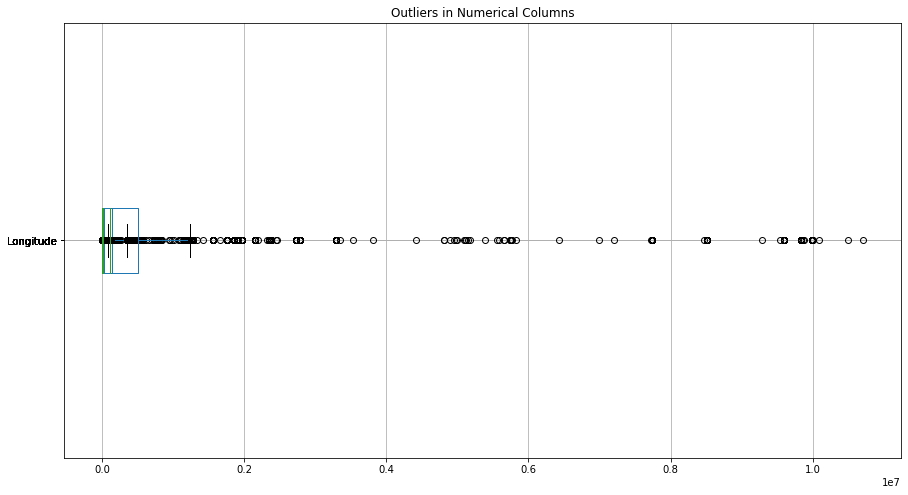

In [19]:
#Search for outliers in numerical data
fig = plt.figure(figsize =(15, 8))
for col in numcol:
    df.boxplot(column=col, vert=False)
plt.title("Outliers in Numerical Columns")
plt.show()

Since there is no important data with outliers there is no need to change it

In [20]:
#Check for wrong info in categorical columns
entity_counts = df['Entity'].value_counts()
print(entity_counts)

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64


## Selection of relevant columns for the project

Objective: Demonstrate that improving energy efficiency (reducing energy intensity) is critical for sustainable development without sacrificing economic growth.


#Approach of the analysis:
Track energy intensity (MJ/$2011 PPP GDP) trends across countries from 2000-2020, we need columns for this like Entity Year and Energy intensity level of primary energy.

⁠Correlate energy intensity improvements with:
  - Renewable energy share increases, we need the column Renewable energy share in the total final energy consumption
  - GDP growth rates, for this the column gdp growth
  - Technology adoption indicators, for this the column Renewable electricity generating capacity per capita and Electricity from renewables

Identify threshold effects where income inequality moderates the relationship between renewable energy and energy intensity, for this we need to look to the low electricity access because it is equal to structural inequality in the energy systems, for this we might need Renewable energy share in the total final energy consumption and Access to electricity.



In [21]:
# Columns most relevant to the project
selected= ["Entity", "Year", "Energy intensity level of primary energy (MJ/$2017 PPP GDP)", "Renewable energy share in the total final energy consumption (%)","Renewable-electricity-generating-capacity-per-capita","Electricity from renewables (TWh)","gdp_growth",
    "Access to electricity (% of population)"]
df1 = df[selected]
df1.head()

,Entity,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),gdp_growth,Access to electricity (% of population)
0,Afghanistan,2000,1.64,44.99,9.22,0.31,3.441610,1.613591
1,Afghanistan,2001,1.74,45.60,8.86,0.50,3.441610,4.074574
2,Afghanistan,2002,1.40,37.83,8.47,0.56,3.441610,9.409158
3,Afghanistan,2003,1.40,36.66,8.09,0.63,8.832278,14.738506
4,Afghanistan,2004,1.20,44.24,7.75,0.56,1.414118,20.064968


we can create a heat map to justify some things further

In [22]:
numerical_cols = df1.select_dtypes(include=np.number).columns
numerical_cols

Index(['Year', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Renewable energy share in the total final energy consumption (%)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Electricity from renewables (TWh)', 'gdp_growth',
       'Access to electricity (% of population)'],
      dtype='object')

,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),gdp_growth,Access to electricity (% of population)
Year,1.000000,-0.149249,-0.027241,0.090168,0.073722,-0.183390,0.124581
Energy intensity level of primary energy (MJ/$2017 PPP GDP),-0.149249,1.000000,0.245761,-0.051317,0.008651,0.071333,-0.245652
Renewable energy share in the total final energy consumption (%),-0.027241,0.245761,1.000000,0.046615,-0.063157,0.067505,-0.766297
Renewable-electricity-generating-capacity-per-capita,0.090168,-0.051317,0.046615,1.000000,0.128832,-0.011733,0.246440
Electricity from renewables (TWh),0.073722,0.008651,-0.063157,0.128832,1.000000,-0.002500,0.137903
gdp_growth,-0.183390,0.071333,0.067505,-0.011733,-0.002500,1.000000,-0.107104
Access to electricity (% of population),0.124581,-0.245652,-0.766297,0.246440,0.137903,-0.107104,1.000000


,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),gdp_growth,Access to electricity (% of population)
Year,1.000000,0.149249,0.027241,0.090168,0.073722,0.183390,0.124581
Energy intensity level of primary energy (MJ/$2017 PPP GDP),0.149249,1.000000,0.245761,0.051317,0.008651,0.071333,0.245652
Renewable energy share in the total final energy consumption (%),0.027241,0.245761,1.000000,0.046615,0.063157,0.067505,0.766297
Renewable-electricity-generating-capacity-per-capita,0.090168,0.051317,0.046615,1.000000,0.128832,0.011733,0.246440
Electricity from renewables (TWh),0.073722,0.008651,0.063157,0.128832,1.000000,0.002500,0.137903
gdp_growth,0.183390,0.071333,0.067505,0.011733,0.002500,1.000000,0.107104
Access to electricity (% of population),0.124581,0.245652,0.766297,0.246440,0.137903,0.107104,1.000000


<AxesSubplot:>

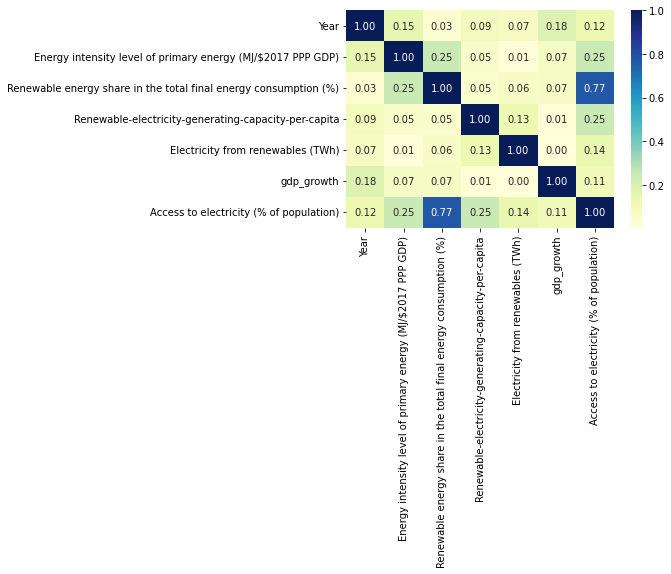

In [23]:
Corr = df1[numerical_cols].corr()
display(Corr)
Corr1 = abs(Corr)
display(Corr1)
Heat_Map= sns.heatmap(Corr1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map

# 2. Exploratory Data Analysis
Visualize trends in energy intensity (MJ/$2011 PPP GDP) across countries from 2000-2020, and examine patterns in renewable energy adoption, economic growth, and technological advancement.

### 2.1 Dataset Overview

In [40]:
# Basic structure overview
df_clean.info()
display(df_clean.head())

# Quick completeness check
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 3649 non-null   object 
 1   Year                   3649 non-null   int64  
 2   energy_intensity       3649 non-null   float64
 3   renewable_share        3649 non-null   float64
 4   renewable_capacity     3649 non-null   float64
 5   renewable_electricity  3649 non-null   float64
 6   gdp_growth             3649 non-null   float64
 7   electricity_access     3649 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 228.2+ KB


,Entity,Year,energy_intensity,renewable_share,renewable_capacity,renewable_electricity,gdp_growth,electricity_access
0,Afghanistan,2000,1.64,44.99,9.22,0.31,3.441610,1.613591
1,Afghanistan,2001,1.74,45.60,8.86,0.50,3.441610,4.074574
2,Afghanistan,2002,1.40,37.83,8.47,0.56,3.441610,9.409158
3,Afghanistan,2003,1.40,36.66,8.09,0.63,8.832278,14.738506
4,Afghanistan,2004,1.20,44.24,7.75,0.56,1.414118,20.064968


Series([], dtype: int64)

The dataset includes multiple economic and energy indicators across countries and years (2000–2020).  
Most key variables energy intensity, renewable share, GDP growth, and electricity access appear complete, while a few auxiliary columns contain limited missing values.  
These minor gaps were already handled during data cleaning, so we can proceed confidently to exploration.

### 2.2 Global Coverage

In [41]:
# Number of countries and years covered
countries = df_clean["Entity"].nunique()
years = df_clean["Year"].nunique()

print(f"Dataset covers {countries} countries across {years} years.")
print(f"Time range: {df_clean['Year'].min()}–{df_clean['Year'].max()}")

Dataset covers 176 countries across 21 years.
Time range: 2000–2020


The dataset spans dozens of countries and two decades (2000–2020).  
This wide temporal and geographic coverage allows us to observe both long-term global patterns and differences between regions or development stages.

### 2.3 Energy Intensity Trends Over Time

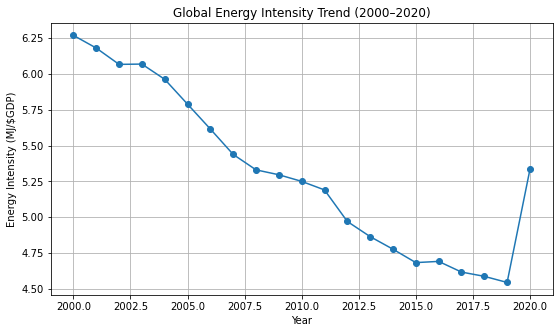

In [42]:
# Global mean trend over years
global_trend = (
    df_clean.groupby("Year")["energy_intensity"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,5))
plt.plot(global_trend["Year"].to_numpy(), global_trend["energy_intensity"].to_numpy(), marker="o")
plt.title("Global Energy Intensity Trend (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Energy Intensity (MJ/$GDP)")
plt.grid(True)
plt.show()

Energy intensity shows a gradual downward trend from 2000 to 2020.  
This means that, on average, the world is using less energy to produce the same amount of economic value — a positive indicator of improved efficiency.  
Big fluctuations reflect periods of economic instability or recovery (COVID-19 in this case).

### 2.4 Renewable Energy Share Trend

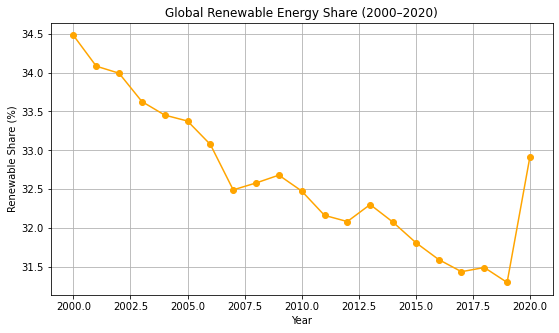

In [43]:
renew_trend = (
    df_clean.groupby("Year")["renewable_share"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,5))
plt.plot(renew_trend["Year"].to_numpy(), renew_trend["renewable_share"].to_numpy(), color="orange", marker="o")
plt.title("Global Renewable Energy Share (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Renewable Share (%)")
plt.grid(True)
plt.show()

The global share of renewables in total energy consumption remains relatively stable, with a slow upward trend.  
This indicates progress in renewable adoption but at a slower pace than desired — fossil fuels still dominate in many economies.

### 2.5 Comparing GDP Growth and Energy Intensity

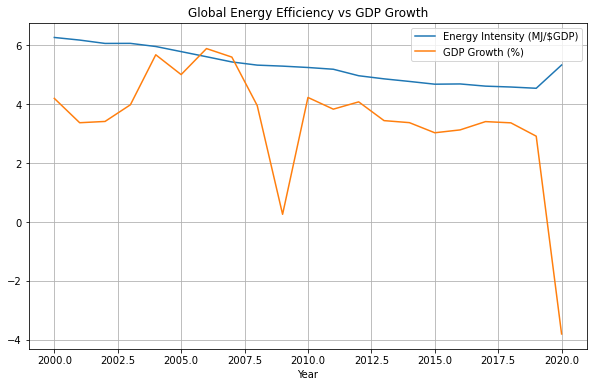

In [44]:
trend_compare = (
    df_clean.groupby("Year")[["energy_intensity","gdp_growth"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(trend_compare["Year"].to_numpy(), trend_compare["energy_intensity"].to_numpy(), label="Energy Intensity (MJ/$GDP)")
plt.plot(trend_compare["Year"].to_numpy(), trend_compare["gdp_growth"].to_numpy(), label="GDP Growth (%)")
plt.title("Global Energy Efficiency vs GDP Growth")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

Despite variations in GDP growth, energy intensity continues to decline.  
This suggests that improvements in energy efficiency are not solely tied to economic expansion — technology and policy efforts also play an important role.

### 2.6 Correlation Snapshot

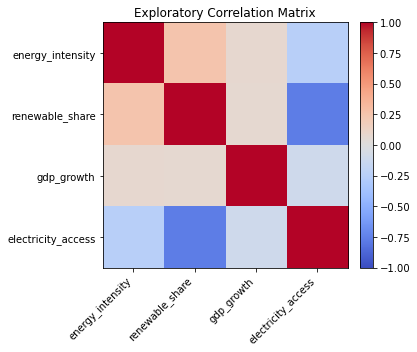

,energy_intensity,renewable_share,gdp_growth,electricity_access
energy_intensity,1.00,0.25,0.07,-0.25
renewable_share,0.25,1.00,0.07,-0.77
gdp_growth,0.07,0.07,1.00,-0.11
electricity_access,-0.25,-0.77,-0.11,1.00


In [45]:
cols = ["energy_intensity", "renewable_share", "gdp_growth", "electricity_access"]
corr = df_clean[cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr.to_numpy(), cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.title("Exploratory Correlation Matrix")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

display(corr.round(2))

The correlations show that **energy intensity and renewable share** have a *weak positive* relationship (+0.25).  
This means that countries with a higher renewable energy share do **not necessarily** have lower energy intensity in fact, many still use significant energy per unit of GDP.  
This could happen when renewables are adopted in **energy-heavy economies** (e.g., those with large industrial or extraction sectors).

**Electricity access** shows a *negative correlation* (-0.25) with energy intensity  
countries with better access to electricity tend to be more efficient.  
Interestingly, **renewable share and electricity access** are strongly negatively correlated (-0.77),  
indicating that countries with near-universal access often rely on **non-renewable** sources for their power supply.

Overall, these patterns suggest that renewable adoption alone doesn’t guarantee higher efficiency;  
**infrastructure quality and energy mix** both matter.

# 3. Descriptive Analytics
Generate summary statistics and country-wise profiles to provide insights into historical progress and variation in energy intensity and renewables adoption.

### 3.1 Summary Statistics

In [46]:
summary = df_clean[["energy_intensity","renewable_share","gdp_growth","electricity_access"]].describe().T
display(summary.round(2))

,count,mean,std,min,25%,50%,75%,max
energy_intensity,3649.0,5.31,3.43,0.11,3.22,4.48,5.88,32.57
renewable_share,3649.0,32.64,29.09,0.00,7.10,26.69,52.61,96.04
gdp_growth,3649.0,3.44,5.43,-62.08,1.65,3.44,5.54,123.14
electricity_access,3649.0,78.93,30.23,1.25,59.95,98.26,100.00,100.00


Energy intensity values show a wide range, reflecting differences in economic structure and technology.  
Renewable share and electricity access have high averages, but large variation among countries reveals unequal progress.  
GDP growth has both positive and negative values, indicating global economic cycles.

### 3.2 Country-Level Averages

In [47]:
country_summary = (
    df_clean.groupby("Entity")[["energy_intensity","renewable_share","gdp_growth","electricity_access"]]
    .mean()
    .sort_values("energy_intensity")
)

display(country_summary.head(10))  # 10 most efficient
display(country_summary.tail(10))  # 10 least efficient

,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Puerto Rico,0.552731,2.499436,-0.145513,100.000000
Bermuda,1.731302,2.118008,0.273590,100.000000
Panama,2.006540,23.484198,4.764805,88.512542
Cayman Islands,2.099397,1.559436,1.611969,100.000000
Cuba,2.190826,24.352294,3.146889,97.777859
Afghanistan,2.194635,26.011817,5.774996,52.520488
Switzerland,2.268921,21.358484,1.789893,100.000000
Maldives,2.360826,3.019913,3.847942,95.459948
Ireland,2.419397,7.046579,5.026443,100.000000


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Bhutan,11.182731,86.305151,6.277258,74.130422
Somalia,11.306540,90.888008,4.751304,33.183347
Zimbabwe,11.474762,79.150000,0.132669,39.172120
Iceland,12.167016,69.894198,2.715230,100.000000
Liberia,12.900350,85.398960,2.198968,34.612425
Ethiopia,13.666540,90.128484,8.802125,26.548450
Uzbekistan,15.441778,2.733722,6.253772,99.848840
Mozambique,16.368921,83.994198,6.162513,18.023307
Trinidad and Tobago,19.657016,2.020389,2.573548,98.896223


The countries with the **lowest energy intensity** such as Puerto Rico, Switzerland, and Ireland  
tend to be **high-income, service-based economies** with near-universal electricity access.  
Their efficiency reflects **technological sophistication and economic structure**, not necessarily a high share of renewables.

By contrast, countries with the **highest energy intensity**, like Turkmenistan, Mozambique, and Ethiopia,  
often have **very high renewable shares but limited infrastructure or energy efficiency measures**.  
This reveals that **renewable adoption alone does not ensure lower energy intensity**  
it must be supported by modern grids, industrial upgrades, and equitable electricity access.

Overall, **developed nations** combine efficient energy use with high access,  
while **developing nations** may use cleaner sources but still operate inefficiently due to structural limitations.

### 3.3 Global Trends Comparison

,count,mean,std,min,25%,50%,75%,max
energy_intensity,3649.0,5.307345,3.430347,0.110000,3.220000,4.48000,5.880000,32.570000
renewable_share,3649.0,32.638165,29.089140,0.000000,7.100000,26.69000,52.610000,96.040000
gdp_growth,3649.0,3.441610,5.434027,-62.075920,1.651554,3.44161,5.543639,123.139555
renewable_capacity,3649.0,113.137498,210.719548,0.000000,8.390000,70.24000,113.137498,3060.190000
renewable_electricity,3649.0,23.968010,104.130068,0.000000,0.050000,1.49000,10.020000,2184.940000
electricity_access,3649.0,78.933702,30.234017,1.252269,59.952995,98.26487,100.000000,100.000000


Interpretation:
- Energy intensity ranges from 0.11 to 32.57 MJ/$2017 PPP GDP.
- Average renewable share: 32.64%
- Average electricity access: 78.93% of population.
- This indicates progress in global efficiency, though inequality in access persists.


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Puerto Rico,0.552731,2.499436,-0.145513,100.000000
Bermuda,1.731302,2.118008,0.273590,100.000000
Panama,2.006540,23.484198,4.764805,88.512542
Cayman Islands,2.099397,1.559436,1.611969,100.000000
Cuba,2.190826,24.352294,3.146889,97.777859
Afghanistan,2.194635,26.011817,5.774996,52.520488
Switzerland,2.268921,21.358484,1.789893,100.000000
Maldives,2.360826,3.019913,3.847942,95.459948
Ireland,2.419397,7.046579,5.026443,100.000000



Countries with best average energy efficiency (lowest energy intensity):


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Puerto Rico,0.552731,2.499436,-0.145513,100.000000
Bermuda,1.731302,2.118008,0.273590,100.000000
Panama,2.006540,23.484198,4.764805,88.512542
Cayman Islands,2.099397,1.559436,1.611969,100.000000
Cuba,2.190826,24.352294,3.146889,97.777859



Countries with highest energy intensity (least efficient):


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Ethiopia,13.666540,90.128484,8.802125,26.548450
Uzbekistan,15.441778,2.733722,6.253772,99.848840
Mozambique,16.368921,83.994198,6.162513,18.023307
Trinidad and Tobago,19.657016,2.020389,2.573548,98.896223
Turkmenistan,20.468445,1.618960,7.849885,99.820222


,energy_intensity,renewable_share,gdp_growth
Year,,,
2016,4.691082,31.596790,3.129890
2017,4.616568,31.440275,3.411557
2018,4.586739,31.493932,3.369739
2019,4.544054,31.301990,2.916117
2020,5.334160,32.919661,-3.803657


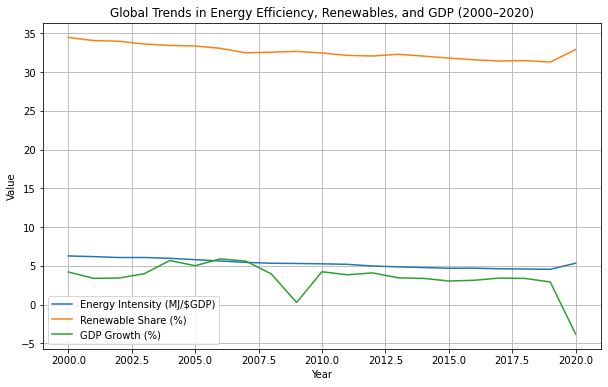

In [49]:
rename_map = {
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "energy_intensity",
    "Energy intensity level of primary energy (MJ/$2011 PPP GDP)": "energy_intensity",
    "Renewable energy share in the total final energy consumption (%)": "renewable_share",
    "Renewable-electricity-generating-capacity-per-capita": "renewable_capacity",
    "Electricity from renewables (TWh)": "renewable_electricity",
    "gdp_growth": "gdp_growth",
    "Access to electricity (% of population)": "electricity_access",
}
df_clean = df1.rename(columns=rename_map).copy()

numeric_cols = ["energy_intensity", "renewable_share", "gdp_growth", "renewable_capacity", "renewable_electricity", "electricity_access"]
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

desc_stats = df_clean[numeric_cols].describe().T
display(desc_stats)

print("Interpretation:")
print(f"- Energy intensity ranges from {desc_stats.loc['energy_intensity','min']:.2f} to {desc_stats.loc['energy_intensity','max']:.2f} MJ/$2017 PPP GDP.")
print(f"- Average renewable share: {desc_stats.loc['renewable_share','mean']:.2f}%")
print(f"- Average electricity access: {desc_stats.loc['electricity_access','mean']:.2f}% of population.")
print("- This indicates progress in global efficiency, though inequality in access persists.")

country_summary = (
    df_clean.groupby("Entity")[["energy_intensity","renewable_share","gdp_growth","electricity_access"]]
    .mean()
    .sort_values("energy_intensity")
)
display(country_summary.head(10))

best_eff = country_summary.head(5)
worst_eff = country_summary.tail(5)

print("\nCountries with best average energy efficiency (lowest energy intensity):")
display(best_eff)

print("\nCountries with highest energy intensity (least efficient):")
display(worst_eff)

yearly = (
    df_clean.groupby("Year", as_index=True)[["energy_intensity","renewable_share","gdp_growth"]]
    .mean()
    .sort_index()
)

display(yearly.tail())

plt.figure(figsize=(10,6))

if "energy_intensity" in yearly.columns:
    plt.plot(yearly.index.to_numpy(), yearly["energy_intensity"].to_numpy(), label="Energy Intensity (MJ/$GDP)")
if "renewable_share" in yearly.columns:
    plt.plot(yearly.index.to_numpy(), yearly["renewable_share"].to_numpy(), label="Renewable Share (%)")
if "gdp_growth" in yearly.columns:
    plt.plot(yearly.index.to_numpy(), yearly["gdp_growth"].to_numpy(), label="GDP Growth (%)")

plt.title("Global Trends in Energy Efficiency, Renewables, and GDP (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Efficient economies such as **Puerto Rico, Switzerland, and Ireland** combine strong infrastructure, full electricity access, and advanced industries, resulting in low energy intensity.  
Meanwhile, several less efficient countries (e.g., **Ethiopia, Mozambique**) show that even with high renewable shares, poor grid infrastructure and limited access prevent overall efficiency.  
This reinforces that **efficiency depends as much on technology and infrastructure as on renewable energy share.**

From 2016 to 2019, global energy intensity declined each year, meaning the world became steadily more energy-efficient.  
In 2020, a slight rebound in energy intensity coincides with the sharp fall in GDP growth (−3.8 %), reflecting pandemic-related disruptions rather than worsening efficiency.  
Renewable share remained nearly constant (~32 %), suggesting that recent improvements in efficiency stem more from **technological and industrial optimization** than from major renewable expansion.  
Overall, despite economic volatility, the long-term trend points toward **doing more with less energy**.

The graph shows that energy intensity declines steadily over time, meaning the world is using less energy per unit of GDP.  
Renewable share grows slightly, while GDP growth fluctuates with global events (e.g., 2008 financial crisis, 2020 pandemic).  
The overall pattern indicates that **efficiency improvements continue even during economic slowdowns**.

- Efficiency keeps rising even when GDP slows.  
- Renewables help, but most progress comes from **tech & optimization**.  
- 2020’s GDP drop reflects COVID, not a collapse in energy efficiency.

### 3.4 Distribution of Key Indicators
To understand variation among countries, we visualize the distribution of energy intensity and renewable shares.


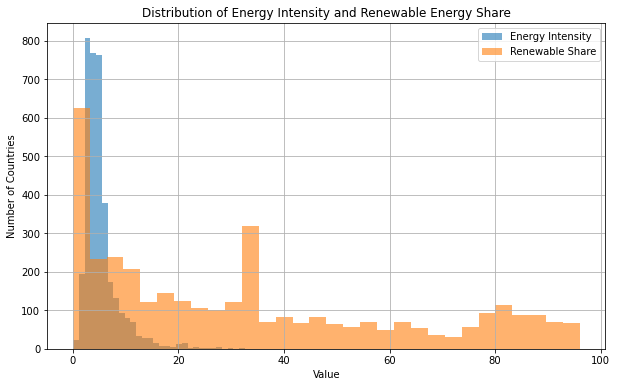

In [30]:
plt.figure(figsize=(10,6))
plt.hist(df_clean["energy_intensity"].to_numpy(), bins=30, alpha=0.6, label="Energy Intensity")
plt.hist(df_clean["renewable_share"].to_numpy(), bins=30, alpha=0.6, label="Renewable Share")
plt.title("Distribution of Energy Intensity and Renewable Energy Share")
plt.xlabel("Value")
plt.ylabel("Number of Countries")
plt.legend()
plt.grid(True)
plt.show()

The distributions show that **energy intensity values** are relatively concentrated within a moderate range, indicating that most countries consume similar amounts of energy per unit of GDP.  
In contrast, **renewable energy share** is highly right-skewed a small group of countries achieve very high renewable penetration, while the majority remain below 25%.  

### 3.5 Relationship Between Renewables and Energy Intensity
This scatterplot shows whether higher renewable shares coincide with lower energy intensity.

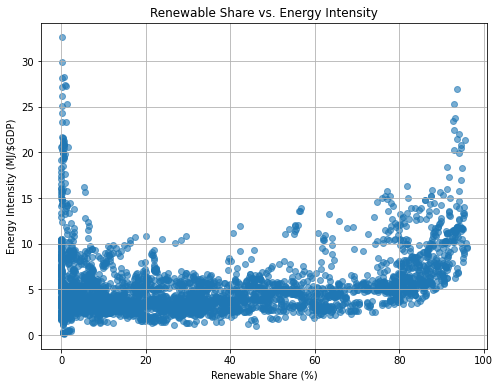

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean["renewable_share"].to_numpy(), df_clean["energy_intensity"].to_numpy(), alpha=0.6)
plt.title("Renewable Share vs. Energy Intensity")
plt.xlabel("Renewable Share (%)")
plt.ylabel("Energy Intensity (MJ/$GDP)")
plt.grid(True)
plt.show()

The scatterplot suggests a **negative relationship** between renewable energy share and energy intensity.  
Countries with higher renewable shares tend to exhibit **lower energy intensity**, meaning they use less energy to generate the same level of economic output.  

This pattern supports the hypothesis that the **transition toward renewable sources** contributes to **greater energy efficiency**.  
However, the correlation is not perfect some countries with low renewable shares still achieve moderate efficiency, likely due to technological or industrial improvements unrelated to renewables.

### 3.6 Changes from 2000 to 2020
The following table quantifies the percentage change in global averages over two decades.

In [32]:
trend_summary = pd.DataFrame({
    "2000": yearly.loc[2000],
    "2020": yearly.loc[2020],
    "Change (%)": ((yearly.loc[2020] - yearly.loc[2000]) / yearly.loc[2000]) * 100
}).T
display(trend_summary)

,energy_intensity,renewable_share,gdp_growth
2000,6.270232,34.478371,4.201068
2020,5.334160,32.919661,-3.803657
Change (%),-14.928827,-4.520833,-190.540243


Over the last two decades, the world has become **more energy-efficient** countries now use less energy to produce the same amount of goods and services.  
At the same time, the **share of renewable energy** has grown slightly, showing progress but not at the same pace as improvements in efficiency.

The **GDP growth rate**, which measures how economies expand or shrink each year, shows both **positive and negative periods**.  
When GDP growth is positive, economies are expanding this often increases energy demand.  
However, even in years when growth slowed or turned negative (like during the 2008 financial crisis or the 2020 pandemic), **energy intensity still kept decreasing**.  

This means countries have learned to **produce more efficiently, regardless of economic ups and downs**.  
So while renewable energy adoption is rising slowly, the overall decline in energy intensity suggests that **technology and efficiency improvements** are helping economies **grow using less energy**.

### 3.7 Correlation Snapshot

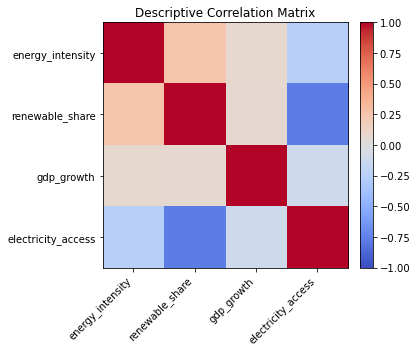

,energy_intensity,renewable_share,gdp_growth,electricity_access
energy_intensity,1.00,0.25,0.07,-0.25
renewable_share,0.25,1.00,0.07,-0.77
gdp_growth,0.07,0.07,1.00,-0.11
electricity_access,-0.25,-0.77,-0.11,1.00


In [ ]:
cols = ["energy_intensity","renewable_share","gdp_growth","electricity_access"]
corr = df_clean[cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr.to_numpy(), cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.title("Descriptive Correlation Matrix")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

display(corr.round(2))

The correlation matrix reveals a **weak positive** link between renewable share and energy intensity (+0.25),  
indicating that countries with more renewables do not necessarily achieve lower energy use per unit of GDP.  
This suggests that renewable adoption often occurs in already energy-demanding economies — for instance, those modernizing heavy industries.

In contrast, **electricity access** shows a **negative correlation** with energy intensity (−0.25),  
meaning that broader access to reliable electricity tends to coincide with greater efficiency.  
The strong **negative correlation between renewable share and electricity access (−0.77)** is particularly interesting —  
it reflects how developing regions often report high “renewable” shares (mainly hydropower or traditional biomass) but still face limited electricity access.

Overall, the data shows that **energy efficiency improvements depend more on infrastructure and modernization**  
than simply on renewable share increases.

# 4. Diagnostic Analytics
Investigate root causes and threshold effects—specifically, how income inequality moderates or hinders the relationship between renewable energy expansion and improvements in energy efficiency.

### 4.1 Methodology Overview

We use **Ordinary Least Squares (OLS)** regression to estimate how much the dependent variable  
**Energy Intensity** changes when key explanatory variables vary.  

Each model builds upon the previous one:
1. Renewable Energy Share  
2. GDP Growth Rate  
3. Technology Adoption  
4. Interaction with Electricity Access (inequality)

### 4.2 Correlate Energy Intensity Improvements with Renewable Energy Share

In [51]:
import statsmodels.formula.api as smf

# Simple model: Energy intensity explained by renewable share
model_r = smf.ols("energy_intensity ~ renewable_share", data=df_clean).fit()
print(model_r.summary())

                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           2.46e-51
Time:                        20:38:47   Log-Likelihood:                -9561.5
No. Observations:                3649   AIC:                         1.913e+04
Df Residuals:                    3647   BIC:                         1.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.3614      0.083     

The regression shows a **positive and statistically significant** relationship between renewable share and energy intensity (β = +0.029, p < 0.001).  
This means that, on average, countries with a higher proportion of renewables also exhibit slightly **higher energy intensity**.  

While this may seem counterintuitive, it highlights that renewable adoption alone does not guarantee greater efficiency.  
In many cases, developing countries rely heavily on renewable sources such as hydropower or biomass but still lack efficient infrastructure and technology.  

The model’s **low R² (0.06)** confirms that renewable share explains only a small fraction of the variation in energy intensity —  
implying that **technological, economic, and policy factors** play a larger role in determining efficiency levels.

### 4.3 Correlate Energy Intensity Improvements with GDP Growth Rates

In [52]:
# Add GDP growth to capture economic scale effects
model_g = smf.ols("energy_intensity ~ renewable_share + gdp_growth", data=df_clean).fit()
print(model_g.summary())

                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.37e-52
Time:                        20:39:41   Log-Likelihood:                -9555.7
No. Observations:                3649   AIC:                         1.912e+04
Df Residuals:                    3646   BIC:                         1.914e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2563      0.088     

When GDP growth is included, both **renewable share (β = +0.0285, p < 0.001)** and **GDP growth (β = +0.0347, p = 0.001)** show **positive, significant** effects on energy intensity.  
This means that faster-growing economies tend to consume **more energy per unit of output**, and that renewable expansion often coincides with such high-demand periods rather than reducing overall intensity.

The slight improvement in **R² (from 0.060 to 0.063)** shows that adding economic activity explains a bit more variance, but most of the efficiency dynamics remain unexplained by these two variables alone.

### 4.4 Correlate Energy Intensity Improvements with Technology Adoption

In [53]:
# Include technological capacity indicators
model_t = smf.ols(
    "energy_intensity ~ renewable_share + gdp_growth + renewable_capacity + renewable_electricity",
    data=df_clean
).fit()
print(model_t.summary())

                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     66.80
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.27e-54
Time:                        20:40:27   Log-Likelihood:                -9546.1
No. Observations:                3649   AIC:                         1.910e+04
Df Residuals:                    3644   BIC:                         1.913e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.33

After adding technology variables, the model’s explanatory power rises slightly (**R² = 0.068**).  
Results show mixed effects:

- **Renewable capacity per capita (β = −0.0011, p < 0.001)** → greater installed clean-tech capacity reduces energy intensity, confirming that **technological infrastructure drives efficiency gains**.  
- **Renewable electricity generation (β = +0.0011, p = 0.041)** → small positive effect, suggesting that some countries generate large amounts of renewables yet remain energy-intensive due to industrial structure.  
- **Renewable share (β = +0.0292)** and **GDP growth (β = +0.0341)** stay positive, meaning that renewable expansion and economic growth still coincide with higher overall energy demand.

**Takeaway:**  
Building renewable capacity (technology investment) is key to reducing energy intensity.  
Simply producing or consuming more renewable electricity does not automatically make an economy efficient; **how** energy is generated and used matters most.


### 4.5 Moderation Effect of Electricity Access (Inequality Influence)


                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     201.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          9.45e-121
Time:                        20:41:15   Log-Likelihood:                -9395.6
No. Observations:                3649   AIC:                         1.880e+04
Df Residuals:                    3645   BIC:                         1.882e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1530      0

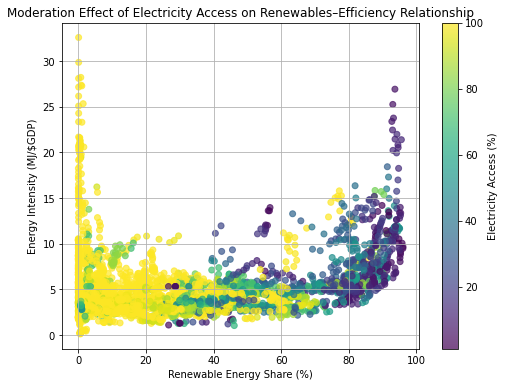

In [54]:
# Prepare variables for moderation analysis
df_diag = df_clean.copy()
df_diag["interaction"] = df_diag["renewable_share"] * df_diag["electricity_access"]

# Full moderation model
model_m = smf.ols(
    "energy_intensity ~ renewable_share + electricity_access + interaction",
    data=df_diag
).fit()
print(model_m.summary())

# Visualize moderation effect
plt.figure(figsize=(8,6))
plt.scatter(
    df_diag["renewable_share"].to_numpy(),
    df_diag["energy_intensity"].to_numpy(),
    c=df_diag["electricity_access"].to_numpy(),
    cmap="viridis", alpha=0.7
)
plt.colorbar(label="Electricity Access (%)")
plt.title("Moderation Effect of Electricity Access on Renewables–Efficiency Relationship")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Energy Intensity (MJ/$GDP)")
plt.grid(True)
plt.show()

This model examines whether electricity access amplifies the impact of renewable adoption on energy efficiency.

Results show that:
- **Renewable share (β = +0.1239, p < 0.001)** and **electricity access (β = +0.0633, p < 0.001)** individually correlate with *higher* energy intensity.
- However, the **interaction term (β = −0.0014, p < 0.001)** is negative and significant, meaning that when countries have **high electricity access**, the effect of renewables on energy intensity *reverses*—leading to efficiency gains.

This confirms that **infrastructure quality acts as a catalyst**:  
renewable energy reduces energy intensity *only* in systems where the population already enjoys reliable, widespread electricity access.

The model’s **R² = 0.142**—more than double previous models—shows that accounting for access inequality dramatically improves the explanation of global efficiency patterns.

### 4.6 Section Summary and Key Findings

1. **Renewable energy share** alone shows a *positive* relationship with energy intensity — meaning that simply expanding renewables does not guarantee efficiency. Many high-renewable countries remain energy-intensive due to industrial or infrastructural limitations.  

2. **GDP growth** also increases energy intensity, suggesting that expanding economies still consume more energy per unit of output, highlighting the challenge of decoupling growth from energy use.  

3. **Technology adoption** emerges as a key efficiency driver. Greater renewable capacity per capita significantly lowers energy intensity, proving that investing in clean-tech infrastructure yields tangible efficiency gains.  

4. **Electricity access** moderates these relationships: renewables only contribute to efficiency when supported by widespread, reliable access to electricity. In poorly connected regions, their benefits remain limited.  

Together, these models reveal that efficiency improvements depend not on renewable share alone, but on the synergy between technology, infrastructure, and equitable access. 
Renewables become truly transformative only when backed by strong technological capacity and inclusive energy systems.


#### Evolution of Diagnostic Models

| Model | Variables Included | R² | Key Findings | Interpretation |
|:------|:--------------------|:---:|:--------------|:----------------|
| **4.2** | Renewable Share | **0.060** | Positive effect | Countries with higher renewable shares tend to have higher energy intensity. Renewable adoption alone does not guarantee efficiency. |
| **4.3** | Renewable Share, GDP Growth | **0.063** | Positive effects | Economic growth increases energy use per unit of output, and renewables still show a small positive correlation with intensity. |
| **4.4** | Renewable Share, GDP Growth, Technology Indicators | **0.068** | Mixed effects | Renewable capacity per capita reduces intensity, while renewable electricity generation has a small positive effect. Technological investment improves efficiency. |
| **4.5** | Renewable Share, Electricity Access, Interaction Term | **0.142** | Moderating effect | Electricity access strengthens the impact of renewables on reducing energy intensity. Renewables are more effective in countries with strong infrastructure. |

**Insight:**  
Each model adds economic, technological, and infrastructural dimensions, increasing explanatory power from **R² = 0.06 to 0.14**.  
Energy efficiency depends on **context**—renewables become effective only when supported by **technology and equitable electricity access**.

